<a href="https://colab.research.google.com/github/Santanukolkata/Data_Science/blob/master/Classification_Metrics/Classification_metric_ROC_AUC_Calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [ ]:
data=load_breast_cancer()
X=data.data
y=data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
logreg=LogisticRegression()

In [ ]:
def model_performance(model_name, X_train, y_train, y_test, Y_pred):

    print('Model name: %s'%model_name)
    print('Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_test, Y_pred))
    print('Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_test, Y_pred))
    print('Train accuracy: %f'%model_name.score(X_train, y_train))

    fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, Y_pred)
    print('Area Under the Precision-Recall Curve: %f'%metrics.auc(fpr,tpr))

    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, Y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
logreg.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=logreg.predict(X_test)

Model name: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Test accuracy (Accuracy Score): 0.968085
Test accuracy (ROC AUC Score): 0.961885
Train accuracy: 0.937008
Area Under the Precision-Recall Curve: 0.337178


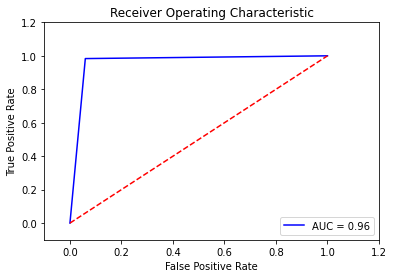

In [ ]:
model_performance(logreg,X_train,y_train,y_test,y_pred)

**Model calibration** is important only if you care about the probabilities your model computes. For instance, let us say that you are building a recommender engine, that ranks products according to user preferences. If your model estimates that user u will buy product a with probability 0.9, and item b with probability 0.7, you can go ahead and serve product a first. No need to calibrate that model.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [20]:
X, y = datasets.make_classification(n_samples=10000, n_features=5,
                                    n_informative=2, n_redundant=1,
                                    random_state=10)

In [21]:
len(X)

10000

In [22]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.99, random_state=42)

In [36]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
lgr = LogisticRegression(C=1, solver='lbfgs')
svc = SVC(max_iter=10000, probability=True)

In [23]:
len(X_test)

9900

In [40]:
probs_lgr = lgr.fit(X_train, y_train).predict_proba(X_test)[:,1]
preds_svc = svc.fit(X_train, y_train).predict(X_test)
print(preds_svc)
probs_svc = svc.decision_function(X_test)
print(probs_svc)
probs_svc = (probs_svc - probs_svc.min()) / (probs_svc.max() - probs_svc.min())

[1 1 0 ... 0 0 1]
[ 0.66544307  1.13287821 -1.37459512 ... -1.0888865  -1.56596823
  1.49629032]


In [31]:
probs_svc.min()

-1.8045869581059875

In [32]:
probs_svc1

array([0.68743109, 0.81752241, 0.11967051, ..., 0.19918574, 0.06640969,
       0.9186632 ])

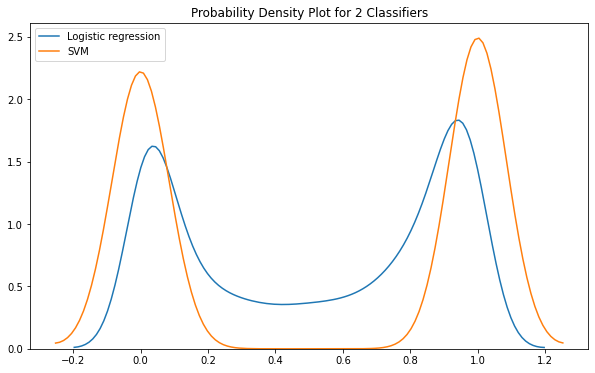

In [41]:
plt.figure(figsize=(10,6))
sns.kdeplot(probs_lgr, label='Logistic regression')
sns.kdeplot(preds_svc, label='SVM')
plt.title("Probability Density Plot for 2 Classifiers")
plt.show()

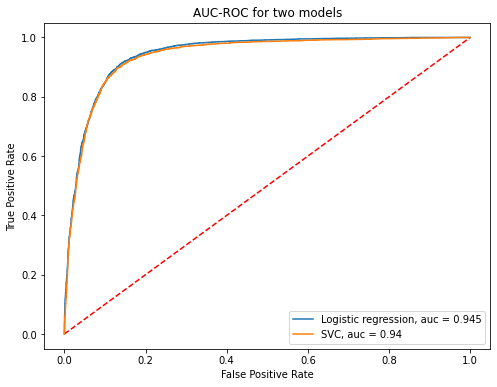

In [42]:

from sklearn import metrics


plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1],'r--')

pred = probs_lgr
label = y_test
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr, tpr, label=f'Logistic regression, auc = {str(round(auc,3))}')

pred = probs_svc
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr, tpr, label=f'SVC, auc = {str(round(auc,3))}')

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("AUC-ROC for two models")
plt.legend()
plt.show()

We can see that the SVM is almost perfect on this data set. But the accuracy is a totally different conversation than calibration. We can have a perfectly accurate model that is not calibrated at all and, on the other hand, a model that is no better than random, which is perfectly calibrated nonetheless. So, how can we check?
The first step is to take all predictions and group them into bins. We are going to group them by the probability estimation that the model made. Next, we calculate the fraction of positives per bin and finally the average confidence per bin, which is just the average of the probability estimates of the samples that belong to that bin. If we plot that average against the fraction of positives per bin we get the reliability plot. We want that plot to resemble the linear plot we saw at the beginning.
To plot the calibration curve of each classifier we define a utility function like the one below.

In [43]:
from sklearn.calibration import calibration_curve


def plot_calibration_curve(name, fig_index, probs):
    """Plot calibration curve for est w/o and with calibration. """

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    
    frac_of_pos, mean_pred_value = calibration_curve(y_test, probs, n_bins=10)

    ax1.plot(mean_pred_value, frac_of_pos, "s-", label=f'{name}')
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title(f'Calibration plot ({name})')
    
    ax2.hist(probs, range=(0, 1), bins=10, label=name, histtype="step", lw=2)
    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")

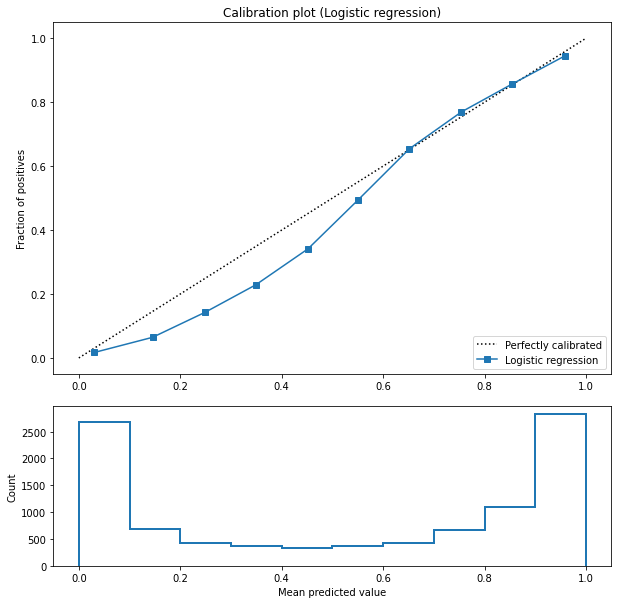

In [44]:
plot_calibration_curve("Logistic regression", 1, probs_lgr)

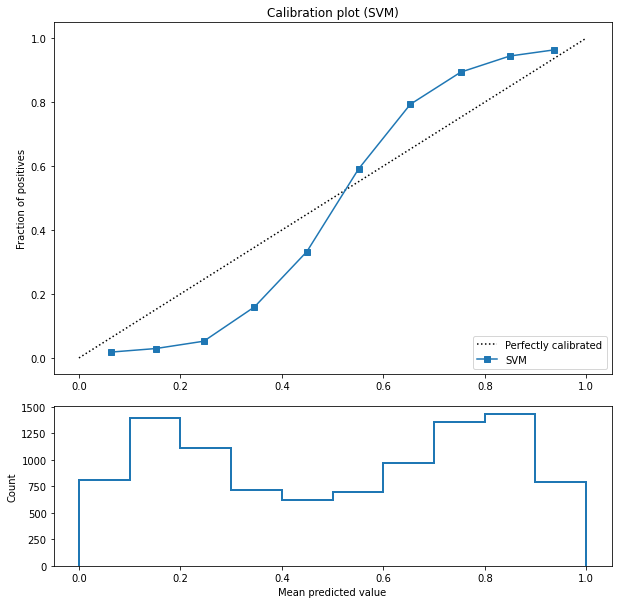

In [45]:
plot_calibration_curve("SVM", 1, probs_svc)

## Calibrating the model

The two most popular methods of calibrating a machine learning model are the isotonic and Platt's method.
Scikit-learn provides a base estimator for calibrating models through the CalibratedClassifierCV class. For this example, we will use the Platt's method, which is equivalent to setting the method argument in the constructor of the class to sigmoid. If you want to use the isotonic method you can pass that instead.


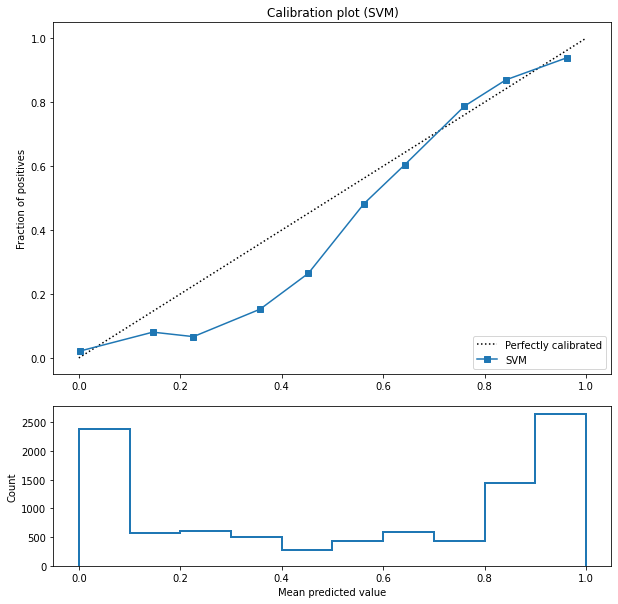

In [48]:
from sklearn.calibration import CalibratedClassifierCV
svc = SVC(max_iter=1000, probability=True)

platts_scaling = CalibratedClassifierCV(svc, cv=2, method='isotonic')
platts_scaling.fit(X_train, y_train)
calibrated_probs = platts_scaling.predict_proba(X_test)[:,1]

plot_calibration_curve("SVM", 3, calibrated_probs)

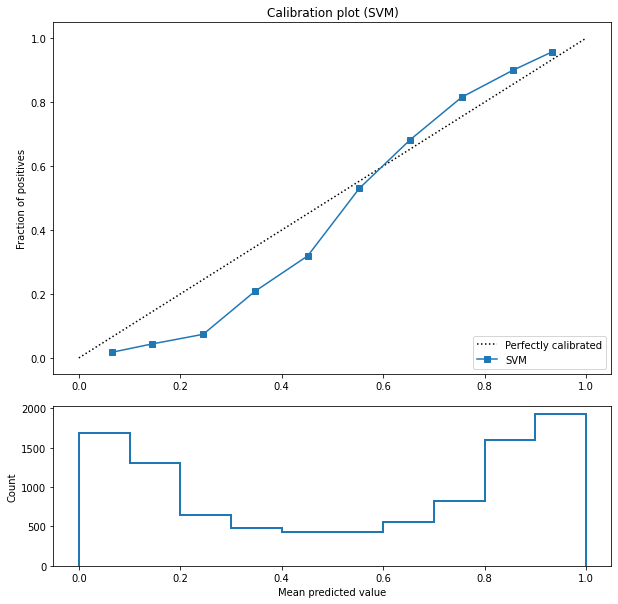

In [49]:
from sklearn.calibration import CalibratedClassifierCV
svc = SVC(max_iter=1000, probability=True)

platts_scaling = CalibratedClassifierCV(svc, cv=2, method='sigmoid')
platts_scaling.fit(X_train, y_train)
calibrated_probs = platts_scaling.predict_proba(X_test)[:,1]

plot_calibration_curve("SVM", 3, calibrated_probs)